# Projekt

   dateRep               day            month             year     
 Length:308         Min.   : 1.00   Min.   : 1.000   Min.   :2020  
 Class :character   1st Qu.: 8.00   1st Qu.: 3.000   1st Qu.:2020  
 Mode  :character   Median :16.00   Median : 6.000   Median :2020  
                    Mean   :15.59   Mean   : 5.646   Mean   :2020  
                    3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:2020  
                    Max.   :31.00   Max.   :11.000   Max.   :2020  
                                                                   
     cases            deaths       countriesAndTerritories    geoId          
 Min.   :   0.0   Min.   : 0.000   Length:308              Length:308        
 1st Qu.:   1.0   1st Qu.: 0.000   Class :character        Class :character  
 Median :  36.5   Median : 1.000   Mode  :character        Mode  :character  
 Mean   : 192.9   Mean   : 2.218                                             
 3rd Qu.: 141.0   3rd Qu.: 2.000                                  

Iznos varijance za broj slučajeva 231994.7

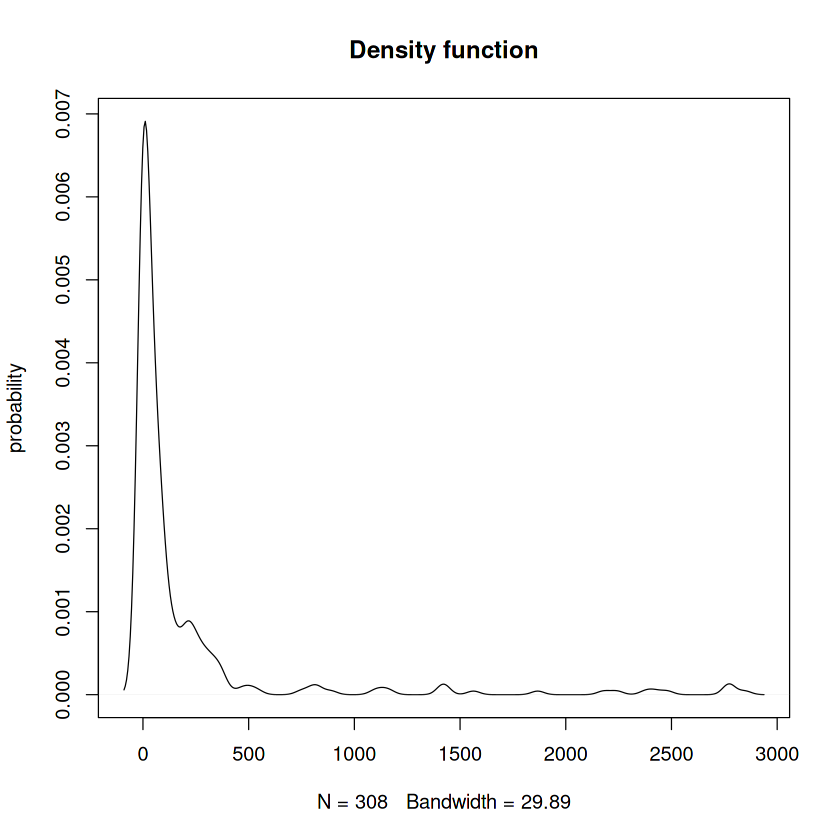

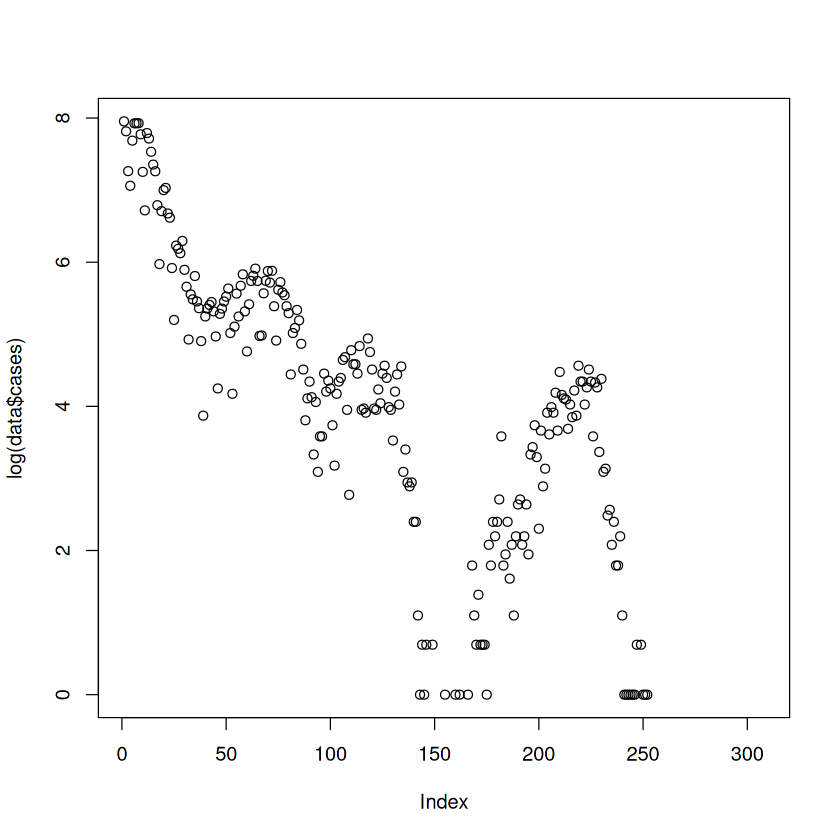

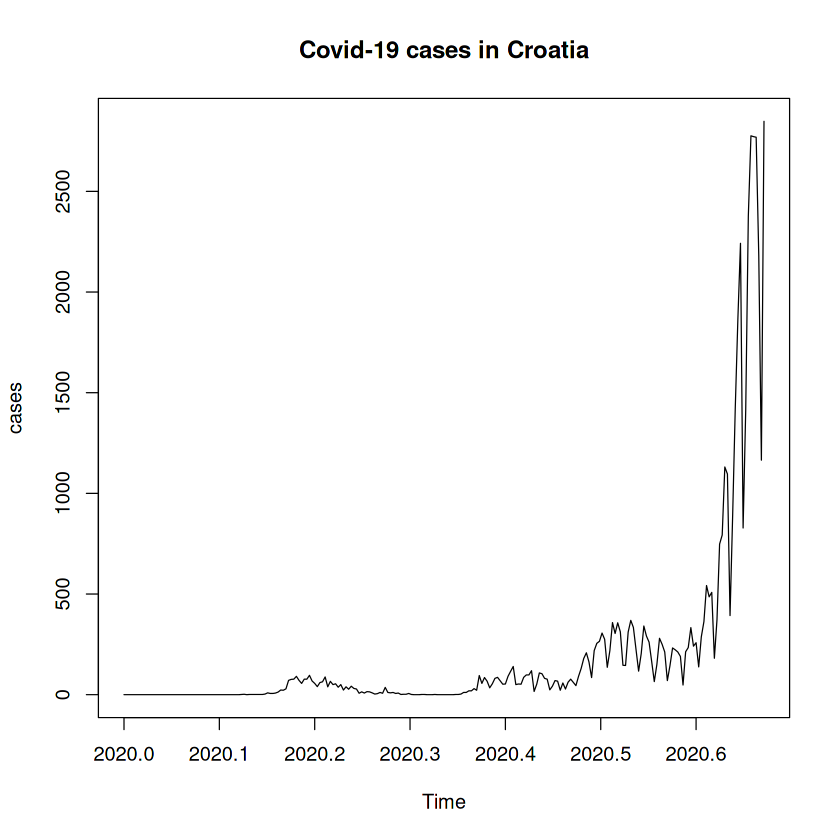

[1] 9053544

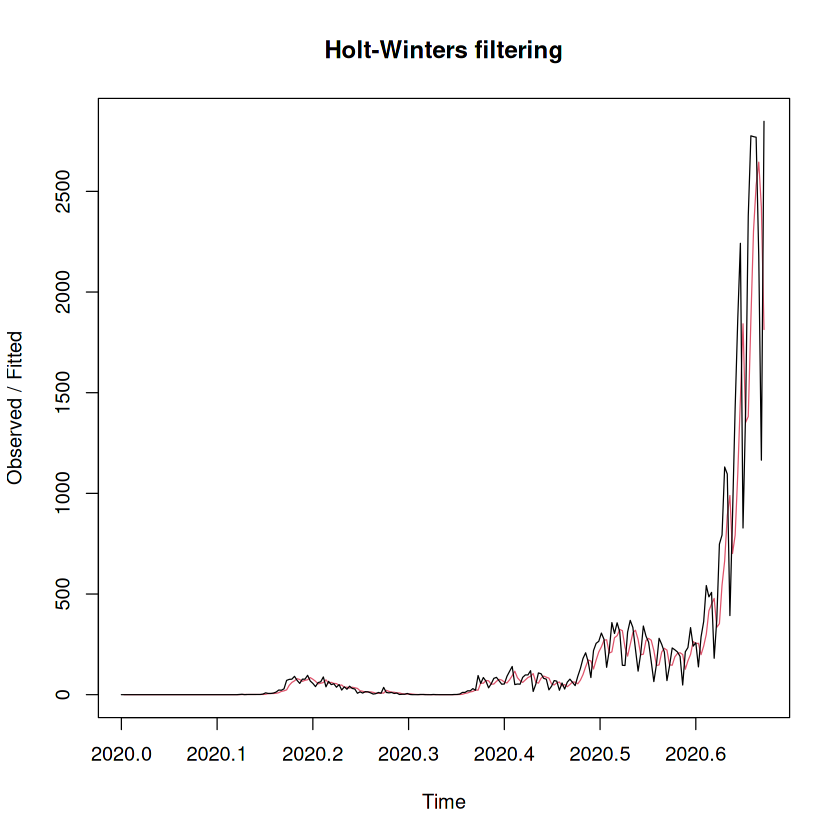

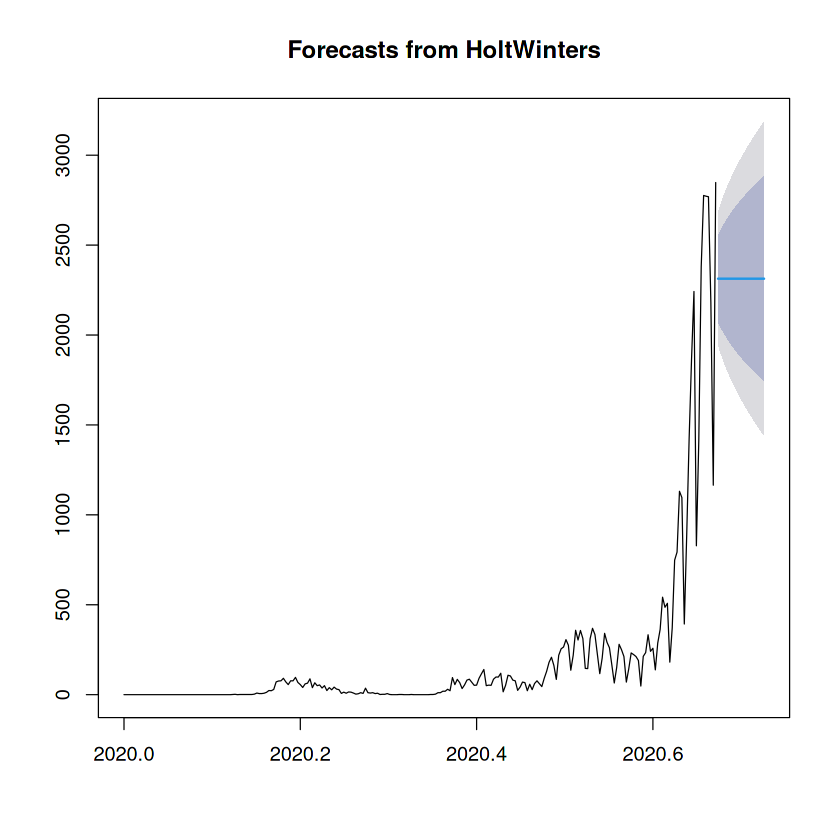

In [22]:
library(forecast)
library(lubridate)

data <- read.csv('covid_case_distribution.csv')
# Samo podaci za HRV, najkasnije do 6.11.
data <- data[data$countriesAndTerritories == 'Croatia',]
data <- data[(data$month == 11 & data$day < 7) | (data$month < 11),]


# Opisna statistička analiza
summary(data) # Kvartili, aritmetička srednja vrijednost
boxplot(data$cases) # Kutijasti dijagram
cat("Iznos varijance za broj slučajeva", var(data$cases))
plot(density(data$cases), ylab="probability", main="Density function") # Funkcija vjerojatnosti

# Podijela podataka na 80/20
smp_size <- floor(0.80 * nrow(data))
## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

# 80% podataka
train <- data[train_ind, ]
# Sortiranje podataka nakon random podijele
train <- train[order(as.Date(train$dateRep, '%d/%m/%Y')),]
# 20% podataka
test <- data[-train_ind, ]
# Sortiranje podataka nakon random podijele
test <- test[order(as.Date(test$dateRep, '%d/%m/%Y')),]

# Pretvorba u Time Series (u biti samo lista sa slucajevima po danima)
# potrebno da mozemo ubaciti u model
train_series <- ts(train$cases, start = decimal_date(as.Date("2020-01-01")),frequency=365)
plot(train_series, ylab="cases", main="Covid-19 cases in Croatia")

# HoltWinters model za predvidanje
covid_forecasts <- HoltWinters(train_series, beta=FALSE, gamma=FALSE)
# Ovo valjda usporeduje stvarne slucajeve sa onima koje 
# model predvida? (crna, crvena crta)
plot(covid_forecasts)

# sum-of-squared-errors
covid_forecasts$SSE

# Vjerojatno isti model ali iz forecast library-a
# ovo sto je na kraju nacrtano su kao predikcije
# (sto je tamnije to je veca vjerojatnost da
# ce bit takva vrijednost)
# h=20 znaci da radi predvidanja za sljedecih 20 dana
covid_forecasts2 <- forecast:::forecast.HoltWinters(covid_forecasts, h=20)
plot(covid_forecasts2)
#plot(x=train$dateRep, y=train$cases)